In [1]:
# Import statements
from utility_functions import *
import matplotlib.pyplot as plt
import numpy as np

### Overview
The K Means algorithm is an unsupervised method of machine learning - in other words it does not need to be trained on pre classified data. The algorithm needs to be told in advance how many clusters to split the data in to. This typically requires the user to the plot the data set before hand, and visually inspect how many clusters are present.



### Method
#### Problem set up

First, let's generate and plot some data. We'll start with two clusters for now. If the code below doesn't make sense, refer to the generate_data notebook in the utilities folder for more detailed instructions.

In a real problem, we would not have access to the allocations array; here we will just use it to check the accuracy of our algorithm.

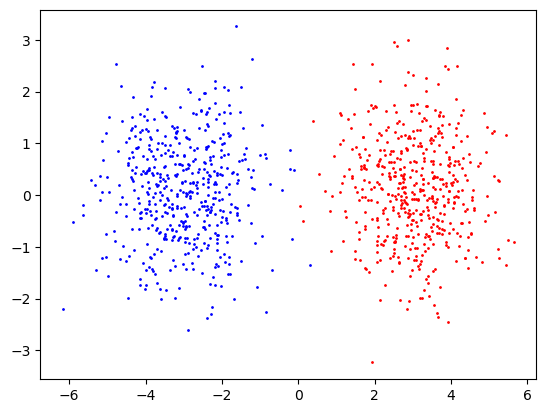

In [97]:
# Generate data
data, assignements = generate_data(1000, 2)

# Separate data into clusters.
cluster_0 = data[assignements == 0]
cluster_1 = data[assignements == 1]

# Plot each cluster
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], c='r', s=1)
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='b', s=1)
plt.show()

As can be seen, the data is visually separable into two clusters. From here on, we will not reference the assignements array - we will assume we only have access to an unclassified data set.

The aim is therefore to separate the following data into two groups:

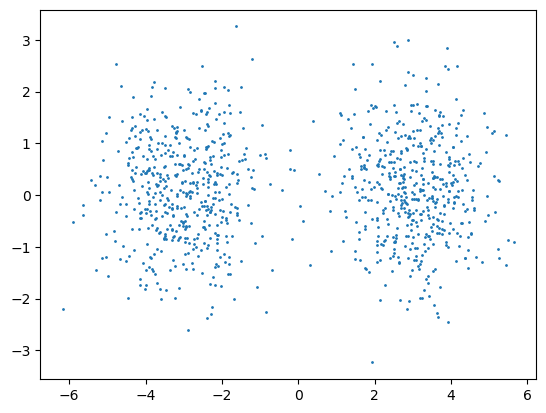

In [98]:
plt.scatter(data[:, 0], data[:, 1], s=1)
plt.show()

#### Initialisation
Firstly, we need to identify how many clusters we want to split the data in to. In this case, a visual inspection reveals that we want two groups. 

Next, we need to initialise what are called the centroids. These will eventually act as the centres of each cluster, but to begin with we just need any random values. We needs as many centroids as we want clusters - in this case, two.

In [99]:
def initialise_random(data):
    # Randomly select the two indexes of the centroids
    ind_1 = np.random.choice(data.shape[0], replace=False)
    ind_2 = np.random.choice(data.shape[0], replace=False)
    
    # Use these indexes to access to coordinates from the data set
    centroid_1 = data[ind_1]
    centroid_2 = data[ind_2]

    return centroid_1, centroid_2

centroids = initialise_random(data)


There are other methods for initialising the clusters - the KMeans++ algorithm will be covered at the end. At this stage, only the simplest is mentioned so we can get to the more interesting parts of the algorithm quickly. 

We can now plot these centroids on top of the data. We'll write this in a function as it will be useful later.

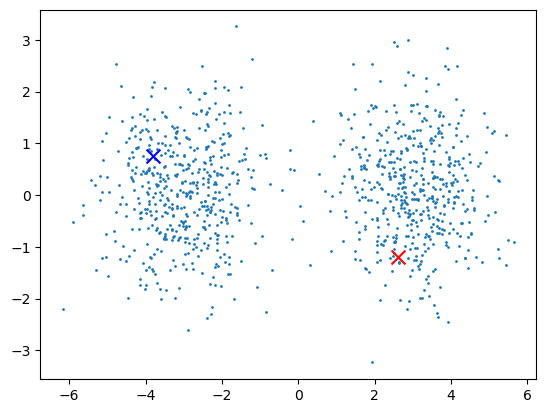

In [100]:
def first_plot(data, centroids):
    centroid_0, centroid_1 = centroids
    plt.scatter(data[:, 0], data[:, 1], s=1)
    
    plt.scatter(centroid_0[0], centroid_0[1], marker='x', s=100, c='r')
    plt.scatter(centroid_1[0], centroid_1[1], marker='x', s=100, c='b')
    plt.show()
    return

first_plot(data, centroids)

#### First allocation
We now make our first allocation. In this step, we assign each data point a cluster depending on which centroid it is closest to. We will store this assigment in a separate array, so that the first element of the assignment array corresponds to the first data point in the data array.

Points are assigned based on their nearest centroid. We'll say that points closest to the green cross are assigned the value 0, and those closest to the orange cross are assigned the value 1.

We'll first need a function to calculate the distance between two points, and then iterate through the data set, calculating the distance to each centroid.

In [101]:
def distance(x, y):
    return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)


def update_allocations(data, centroids):
    centroid_0, centroid_1 = centroids
    allocations = []
    
    for x in data:                                              
        if distance(x, centroid_0) < distance(x, centroid_1):  
            allocations.append(0)
        else:
            allocations.append(1)
    return np.array(allocations)

allocations = update_allocations(data, centroids)


The power of saving the allocations in this way is that it provides an easy way to separate our data. We can use numpy's indexing to write data\[allocations==1] to get all the data points in the first cluster, and data\[allocations==2] to get those in the second.

Using this method, we can plot the current assignments as follows:

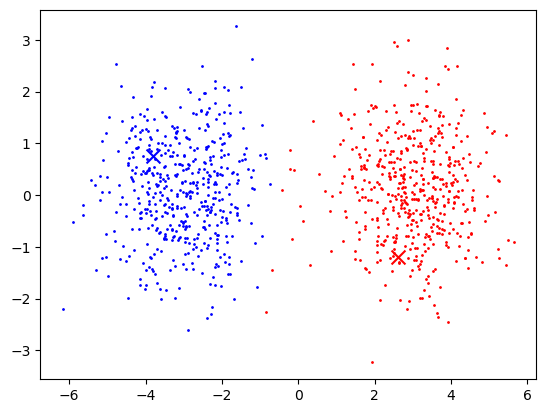

In [102]:
def plot(data, centroids, allocations):
    centroid_0, centroid_1 = centroids
    
    # Filter the data into each cluster
    cluster_0 = data[allocations == 0]
    cluster_1 = data[allocations == 1]
  
    
    # Plot the clusters
    plt.scatter(cluster_0[:, 0], cluster_0[:, 1], c='r', s=1)
    plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='b', s=1)
    
    # Plot the centroids
    plt.scatter(centroid_0[0], centroid_0[1], marker='x', c='r', s=100)
    plt.scatter(centroid_1[0], centroid_1[1], marker='x', c='b', s=100)
    
    plt.show()
    return

plot(data, centroids, allocations)

This provides us with visual confirmation that all the data points closest to the red centroid have been assigned to one group, and those closest to the blue have been assigned to another.

#### Update the centroids
Now that we have classified our data into groups, we can improve upon our guesses for the centroids. We are going to update them to be the centres of each cluster. 

We can do this by once again separating our data into clusters, and finding the mean of each cluster. The axis=0 argument ensure the mean of x and y coordinates are calculated and returned separately.

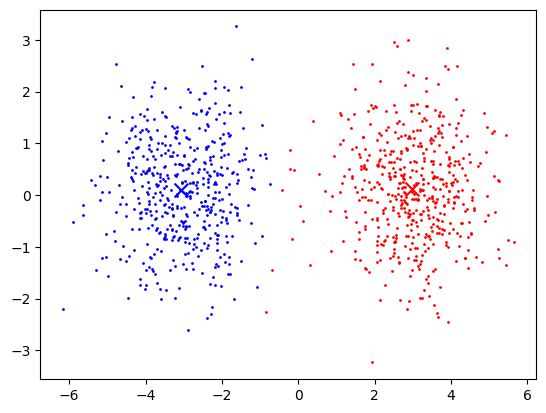

In [103]:
def update_centroids(data, allocations):
    cluster_0 = data[allocations == 0]
    cluster_1 = data[allocations == 1]
    
    centroid_0 = np.mean(cluster_0, axis=0)
    centroid_1 = np.mean(cluster_1, axis=0)
    
    return centroid_0, centroid_1

# Update the centroids
centroids = update_centroids(data, allocations)

# Plot their updated positions
plot(data, centroids, allocations)

    

As can be seen, the centroids are now in the centre of each cluster

#### Repeat!
Now all we need to do is repeat the previous two steps, i.e update the allocations, and then update the centroids. The only extra thing to do is check for convergence. We can do this by testing for when the allocations array no longer updates with subsequent repeats

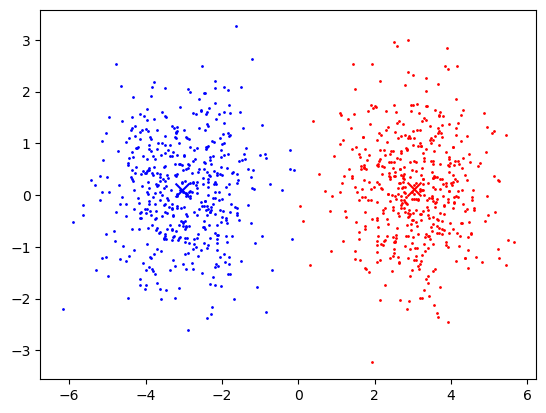

In [104]:
allocations_old = np.array([])

while np.array_equal(allocations, allocations_old) == False:  # Check for convergence
    allocations_old = allocations  # Save old allocations array
    
    allocations = update_allocations(data, centroids)
    centroids = update_centroids(data, allocations)
    
plot(data, centroids, allocations)


As we can see, the algorithm has separated the data into two clusters. 

To gain some more intuition, let's generate some new data, and put the intial centroids far away from the centres of the clusters so the algorithm doesn't converge too quickly. For this example, we'll do this by setting them manually.

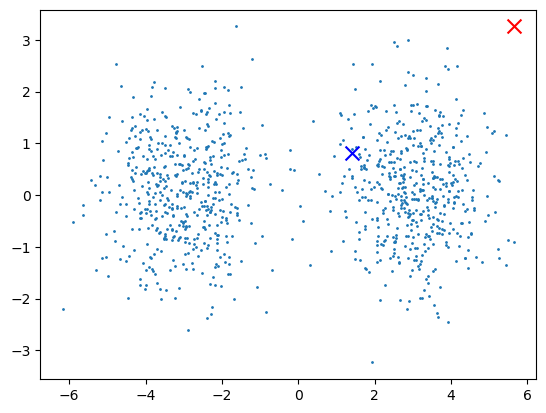

In [105]:
data, assignements = generate_data(1000, 2)

centroid_0 = np.max(data, axis=0)
centroid_1 = centroid_0 / 4

centroids = centroid_0, centroid_1

first_plot(data, centroids)


We can see that the initial centroids are well away from their final positions. We will now iteratively assign the data points clusters, and then update the centroids to be the means of the new clusters. We will plot at each stage.

Cluster data according to nearest centroid


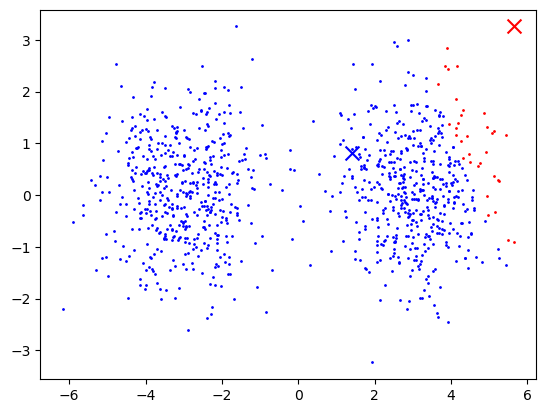

---------------
Update centroids to be means of each cluster


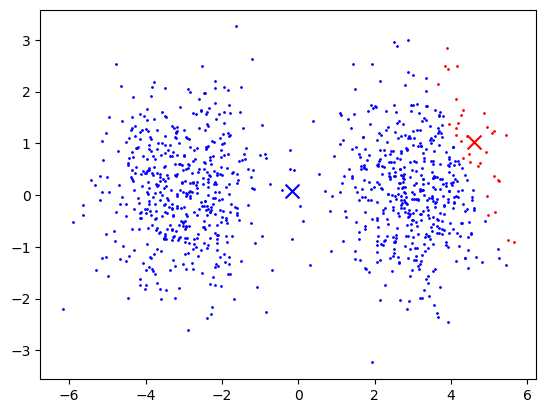

---------------
Cluster data according to nearest centroid


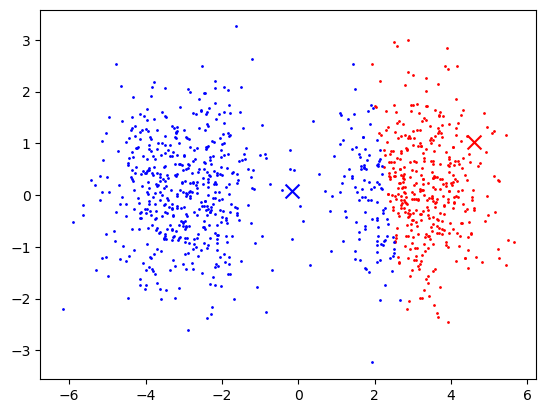

---------------
Update centroids to be means of each cluster


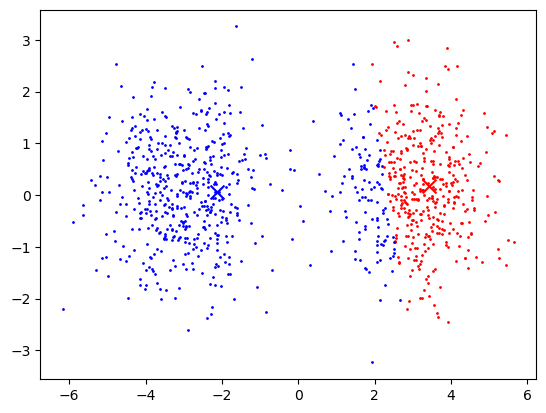

---------------
Cluster data according to nearest centroid


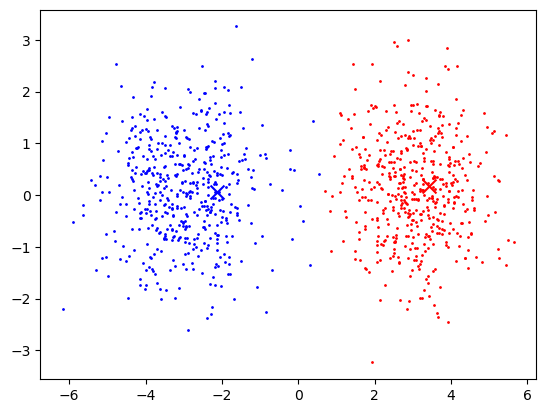

---------------
Update centroids to be means of each cluster


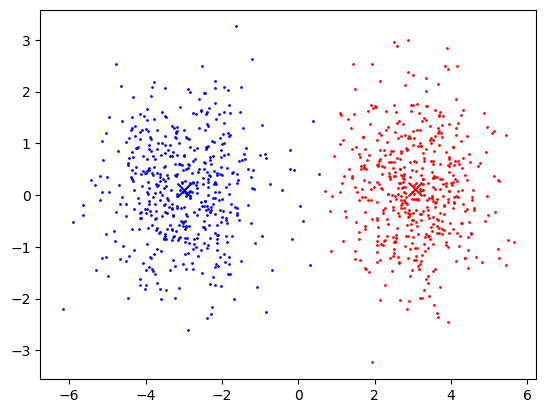

---------------
Cluster data according to nearest centroid


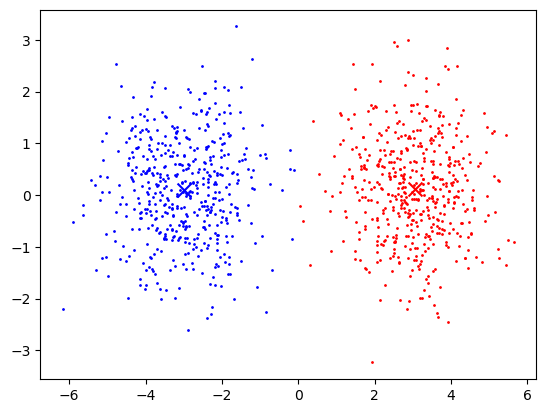

---------------
Update centroids to be means of each cluster


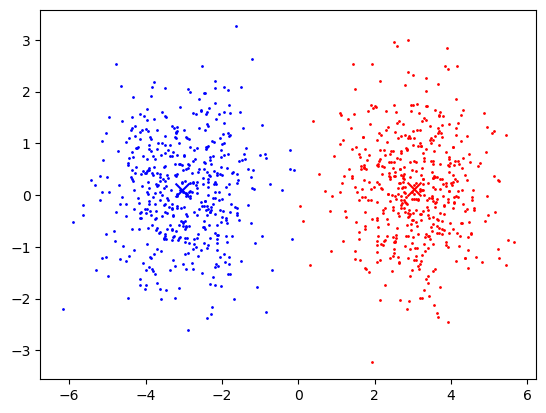

---------------
Cluster data according to nearest centroid


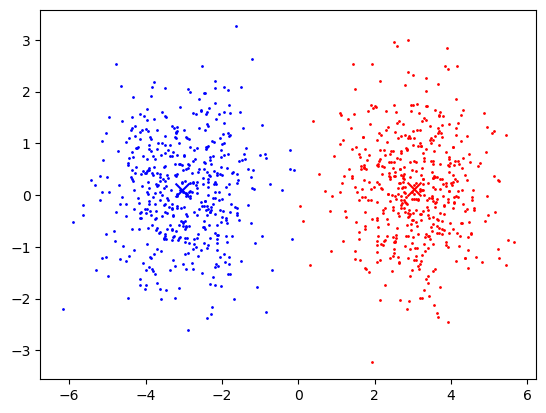

---------------
Update centroids to be means of each cluster


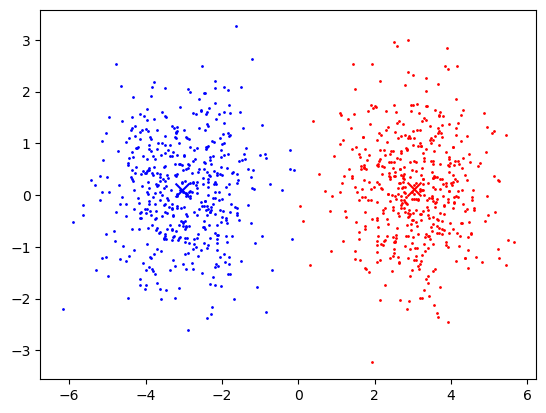

---------------
Converged!


In [106]:
allocations_old = np.array([])

while np.array_equal(allocations, allocations_old) == False:  # Check for convergence
    allocations_old = allocations 
    
    allocations = update_allocations(data, centroids)
    print('Cluster data according to nearest centroid')
    plot(data, centroids, allocations)
    print('---------------')
    
    centroids = update_centroids(data, allocations)
    print('Update centroids to be means of each cluster')
    plot(data, centroids, allocations)
    print('---------------')
    
print('Converged!')
    

#### K Means ++
Now that we understand how the algorithm works, we can make some improvements to the initialisation process. Thinking about the algorithm for a while, we can realise that it will converge most quickly if the initial centroids are far apart. If you don't believe this, play around with some different initial centroids to get a feel for it.

The K Means ++ algorithm takes advantage of this observation. It is an initialistion protocol in which the first centroid is chosen randomly, and the distance to each data point is calculated. The next centroid is chosen from the remaining data points according to a weighted distribution proportional to the square of the distance from the first centroid. Essentially, this protocol increases the probability that the second centroid is initiated far away from the first.

Some simplified versions of the K Means ++ algorithm simply set the second centroid to be the furthest point from the first.

In [107]:
def k_means_plusplus(data):
    # Generate first centroid randomly
    ind_0 = np.random.choice(data.shape[0])
    centroid_0 = data[ind_0]
    
    # Find square of distance of each data point from first centroid and convert to probabilities
    distances = [distance(x, centroid_0) ** 2 for x in data]
    probabilities = distances / np.sum(distances)
    
    # Use the probabilities to weight the selection of the second index
    ind_1 = np.random.choice(data.shape[0], p=probabilities)
    centroid_1 = data[ind_1]
    
    return centroid_0, centroid_1
    
    

#### Putting it all together
Now, we have everything we need to run the K Means algorithm with the K Means ++ initiation protocol. A complete implementation can be found in the .py file in this folder, but it essentially follows the above steps.

We can put everything into one function that runs everything for us. This is also a useful recap of the steps of the algorithm and their order. 

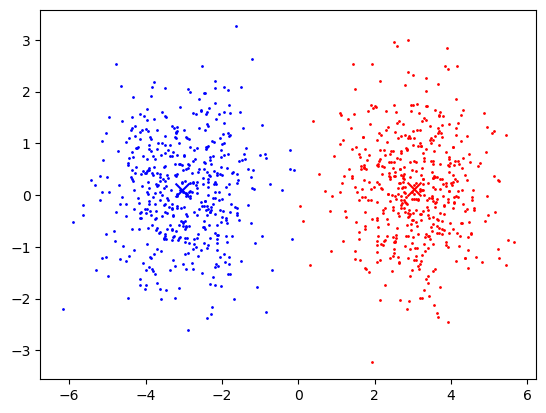

In [108]:
def auto_run(data):
    # Initialise the centroids
    centroids = k_means_plusplus(data)
    
    # Create arrays so while loop passes on first run
    allocations_old = []
    allocations = [1]
    
    # Update allocations and centroids until convergence
    while np.array_equal(allocations, allocations_old) == False:
        allocations_old = allocations 
        
        allocations = update_allocations(data, centroids)
        centroids = update_centroids(data, allocations)
    
    # Plot final results
    plot(data, centroids, allocations)
    return allocations
    
    
data, target_array = generate_data(1000, 2)
    
allocations = auto_run(data)

        

We can use the analyse_data function from the utility_functions file to quantify the results:

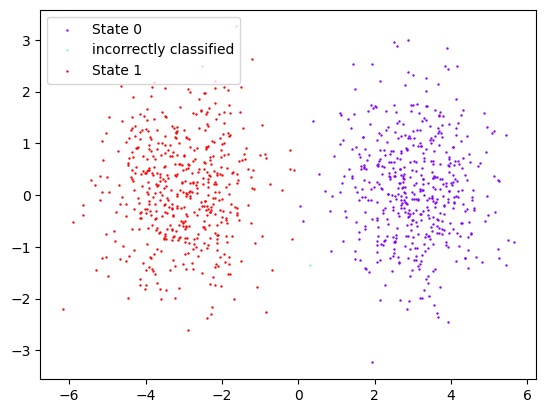

accuracy:  0.999


In [109]:
acc = analyse_data(target_array, allocations, data, 2, supervised=False, plotorno=True)
print('accuracy: ', acc)

#### The general case
The .py file in this folder contains a full implementation of the algorithm. The main difference is that the functions are implemented in a class, and clustering into more than two groups is supported. The algorithm also supports working in more than two dimensions. Feel free to use the class for your own research, and make any adjustments to the class you like. 
It would be amazing if you could reference this repository if you make the code publically accessible so that more people can find and use the library. Cheers!